## Exercise 2.2

#### 1) Use K means clustering to cluster the MNIST dataset. Remember that in unsupervised learning, you do not know what each digit means (they do not have labels). You just cluster them to groups. Also, you don’t know the number of clusters, so you need to choose K. Suggest and use a method to choose K. Analyze the performance. Use t-SNE to visualize the results in 2D. Discuss what it shows.

In [2]:
# First we Import and set up the data

import numpy as np
import matplotlib.pyplot as plt


from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import cross_val_score

from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
mnist

{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 1         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 
      

In [4]:
X, y = mnist["data"].to_numpy(), mnist["target"].to_numpy()
X.shape

(70000, 784)

In [5]:
y.shape

(70000,)

In [6]:
ntrain = 10000
ntest = 69000
x_train = X[:ntrain]
y_train = y[:ntrain]
x_test = X[ntest:]
y_test = y[ntest:]

In [7]:
x_train.shape

(10000, 784)

In [8]:
y_train.shape

(10000,)

In [9]:
x_test.shape

(1000, 784)

In [10]:
y_test.shape

(1000,)

In [11]:
print(np.unique(y_train,return_counts=True))
print(np.unique(y_test,return_counts=True))

(array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object), array([1001, 1127,  991, 1032,  980,  863, 1014, 1070,  944,  978],
      dtype=int64))
(array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object), array([102, 119,  99, 102,  92,  85, 102, 115,  94,  90], dtype=int64))


#### Perform K-means on the dataset

In [12]:
from sklearn.cluster import KMeans
import timeit

start = timeit.default_timer()
kmeans = KMeans(n_clusters=9, random_state=0).fit(x_train)
end = timeit.default_timer()
kmeans.labels_
print("time=%.4f" % (end-start))

time=6.9512


In [13]:
from sklearn.cluster import MiniBatchKMeans
start = timeit.default_timer()
kmeans = MiniBatchKMeans(n_clusters=9)
kmeans.fit(x_train)
end = timeit.default_timer()
kmeans.labels_
print("time=%.4f" % (end-start))

C:\Users\ostavre\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


time=0.5721


#### Use Elbow method to identify number of Clusters 

In [94]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

range_k = range(2, 25)

sse = []
for k in range_k:
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(x_train)
    sse.append(kmeans.inertia_)

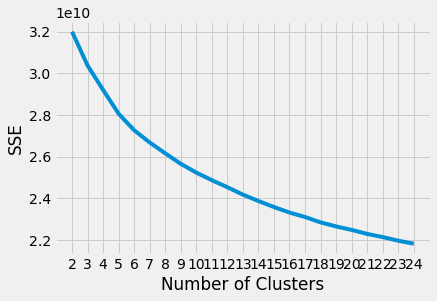

In [95]:
plt.style.use("fivethirtyeight")
plt.plot((range_k), sse)
plt.xticks(range_k)
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [96]:
from kneed import KneeLocator
kl = KneeLocator(
     range_k, sse, curve="convex", direction="decreasing"
 )

kl.elbow


9

#### Use Silhouette Coefficient to identify number of Clusters 

In [97]:
from sklearn.metrics import silhouette_score

silhouette_coefficients = []
for k in range_k:
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(x_train)
    score = silhouette_score(x_train, kmeans.labels_)
    silhouette_coefficients.append(score)

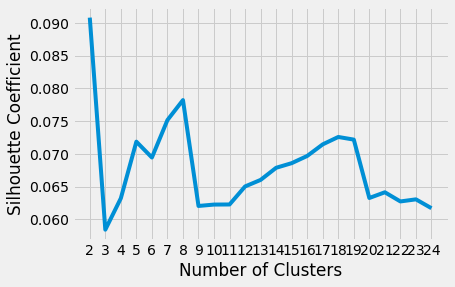

In [98]:
plt.style.use("fivethirtyeight")
plt.plot(range_k, silhouette_coefficients)
plt.xticks(range_k)
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [99]:
silhouette_coefficients

[0.09081592426001425,
 0.058435487282522264,
 0.06323650177913365,
 0.07187512233444174,
 0.0694561470523688,
 0.07517088712192105,
 0.07822420413706105,
 0.06205861511683922,
 0.062271847380989606,
 0.06228691082938526,
 0.0650391800224471,
 0.0660380598520964,
 0.0678890865362617,
 0.06859425779893619,
 0.06969507576448343,
 0.07146536765584845,
 0.0725937499589809,
 0.07219065974204925,
 0.06327665208061434,
 0.06414919429639271,
 0.06274909072445058,
 0.06306921265603234,
 0.061715190226680705]

In [100]:
from sklearn.metrics import homogeneity_score

def calc_metrics(estimator, data, labels):
    #print('Number of Clusters: {}'.format(estimator.n_clusters))
    # Inertia
    inertia = estimator.inertia_
    #print("Inertia: {}".format(inertia))
    # Homogeneity Score
    homogeneity = homogeneity_score(labels, estimator.labels_)
    #print("Homogeneity score: {}".format(homogeneity))
    return inertia, homogeneity

In [101]:
from sklearn.metrics import accuracy_score

iner_list=[]
homo_list=[]

for k in range_k:
    estimator = KMeans(n_clusters=k, **kmeans_kwargs)
    estimator.fit(x_train)
    
    inertia, homo = calc_metrics(estimator, x_train, y_train)
    iner_list.append(inertia)
    homo_list.append(homo)
    

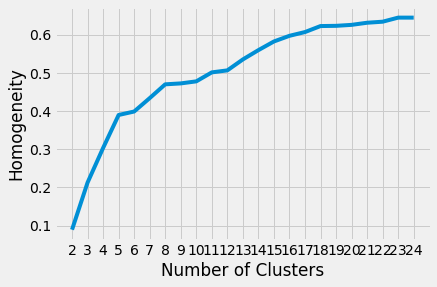

In [102]:
plt.style.use("fivethirtyeight")
plt.plot(range_k, homo_list)
plt.xticks(range_k)
plt.xlabel("Number of Clusters")
plt.ylabel("Homogeneity")
plt.show()

In [103]:
 homo_list

[0.08931438850935196,
 0.21280647145107665,
 0.30343737052766856,
 0.38991351160849014,
 0.39901638972138304,
 0.43409757453761333,
 0.47025819996800544,
 0.4726649356708506,
 0.4780413829395472,
 0.5015652357602295,
 0.5068198978267487,
 0.5355059255394348,
 0.5598741077159043,
 0.5825656764320484,
 0.5973993596493459,
 0.6072403648952992,
 0.6229549226141451,
 0.6235322895779715,
 0.6260953343412983,
 0.6316499932433163,
 0.6343779873337932,
 0.645060379937737,
 0.645051083772443]

#### Plot using t-SNE

In [104]:
kmeans = KMeans(n_clusters=8, **kmeans_kwargs)
kmeans.fit(x_train)
km_labels=kmeans.labels_

In [105]:
from sklearn.manifold import TSNE

start = timeit.default_timer()
model = TSNE(n_components=2, random_state=0)
tsne_data_km = model.fit_transform(x_train)
tsne_data_km = np.vstack((tsne_data_km.T, km_labels)).T
end = timeit.default_timer()

print("time=%.4f" % (end-start))

time=65.4817


C:\Users\ostavre\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


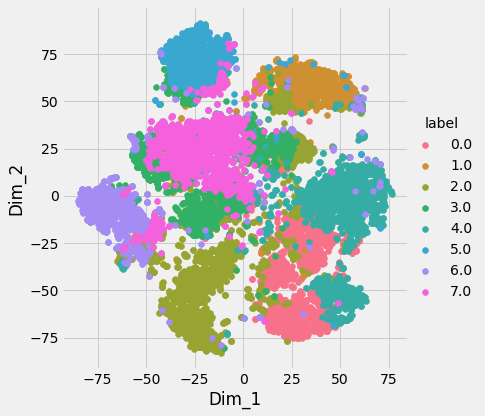

In [106]:
tsne_df_km = pd.DataFrame(data=tsne_data_km, columns=("Dim_1", "Dim_2", "label"))

sns.FacetGrid(tsne_df_km, hue="label", size=6).map(plt.scatter, "Dim_1", "Dim_2").add_legend()
plt.show()

In [26]:
from sklearn.manifold import TSNE

start = timeit.default_timer()
model = TSNE(n_components=2, random_state=0)
tsne_data = model.fit_transform(x_train)
tsne_data = np.vstack((tsne_data.T, y_train)).T
end = timeit.default_timer()

tsne_data
print("time=%.4f" % (end-start))

time=60.7178


C:\Users\ostavre\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


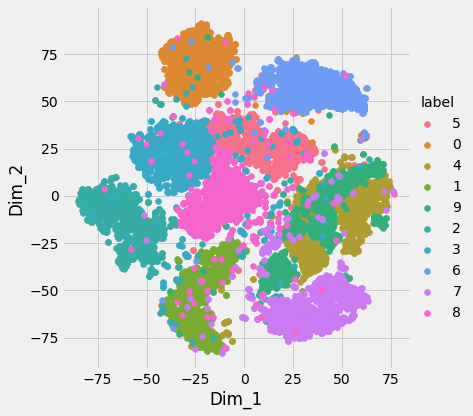

In [27]:
import pandas as pd
import seaborn as sns

tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

sns.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, "Dim_1", "Dim_2").add_legend()
plt.show()

#### 2) Use PCA to reduce the dimensionality of the dataset to 150 and test K-means clustering. Compare the results to the results of K means clustering on the original data. How do the computation times compare?

In [107]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
#x_train = StandardScaler().fit_transform(x_train)
pca = PCA(n_components=150)
start = timeit.default_timer()
pca_res = pca.fit_transform(x_train)
end = timeit.default_timer()
print("time=%.4f" % (end-start))

time=0.9881


In [108]:
print (pca.explained_variance_)
print (pca.explained_variance_ratio_)
print (pca.explained_variance_ratio_.cumsum())

[349917.23332819 247529.40942831 209632.63856522 185786.13018084
 163847.49495103 151410.48093143 112616.3592749  100419.26091439
  95530.38435427  79154.79753948  73054.39950678  70476.18411889
  57872.92183896  57695.42861449  55462.77340082  52781.31067524
  44182.22423119  43352.9341953   39761.7203637   38687.64987279
  35468.78980091  34573.79020096  32401.07828479  31679.61731826
  29327.90679215  28921.54979182  27569.89604204  26609.6619243
  24712.52642687  23512.62017343  22405.45543145  21592.62281197
  20410.46680228  20162.36706421  18938.04777519  18159.34037934
  17612.49141172  16457.24158888  16324.14037659  16041.77952353
  15418.25435429  14368.31391163  14116.19340373  13764.46399743
  12827.44928305  12459.67272237  12026.74273272  11875.57419574
  11291.62991416  11193.0723659   10984.41368866  10838.50301593
  10137.61392884   9804.01328994   9614.46822594   9275.2522362
   9061.82811265   8650.62419804   8531.27748312   8369.34024766
   8155.98892806   7987.537

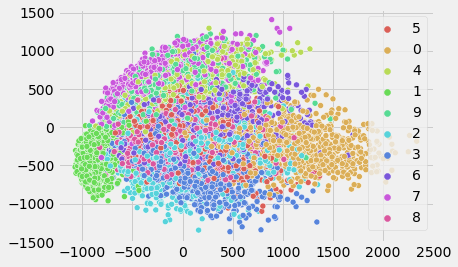

In [109]:
sns.scatterplot(x = pca_res[:,0], y = pca_res[:,1], hue = y_train, palette = sns.hls_palette(10), legend = 'full');

In [110]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

sse_pca = []
for k in range_k:
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(pca_res)
    sse_pca.append(kmeans.inertia_)

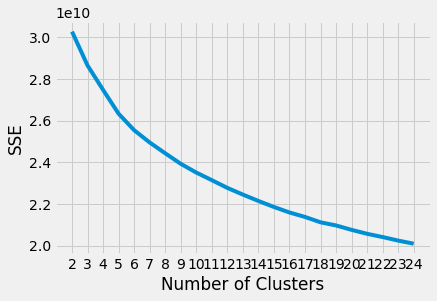

In [111]:
plt.style.use("fivethirtyeight")
plt.plot(range_k, sse_pca)
plt.xticks(range_k)
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [112]:
from kneed import KneeLocator
kl = KneeLocator(
     range_k, sse_pca, curve="convex", direction="decreasing"
 )

kl.elbow

9

In [113]:
start = timeit.default_timer()
kmeans = KMeans(n_clusters=9, random_state=0).fit(pca_res)
end = timeit.default_timer()
kmeans.labels_
print("time=%.4f" % (end-start))

time=1.4072


In [117]:
from sklearn.metrics import silhouette_score

silhouette_coefficients = []
for k in range_k:
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(pca_res)
    score = silhouette_score(pca_res, kmeans.labels_)
    silhouette_coefficients.append(score)

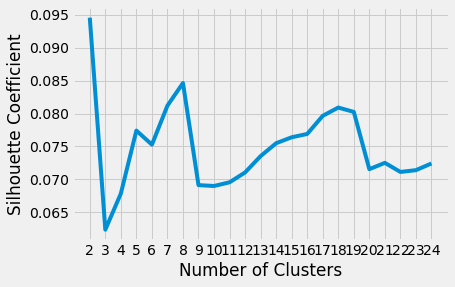

In [118]:
plt.style.use("fivethirtyeight")
plt.plot(range_k, silhouette_coefficients)
plt.xticks(range_k)
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [114]:
from sklearn.metrics import accuracy_score

iner_list=[]
homo_list=[]

for k in range_k:
    estimator = KMeans(n_clusters=k, **kmeans_kwargs)
    estimator.fit(pca_res)
    
    inertia, homo = calc_metrics(estimator, pca_res, y_train)
    iner_list.append(inertia)
    homo_list.append(homo)
    

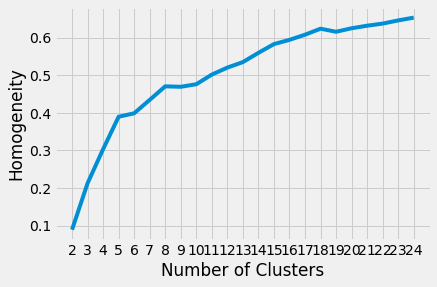

In [115]:
plt.style.use("fivethirtyeight")
plt.plot(range_k, homo_list)
plt.xticks(range_k)
plt.xlabel("Number of Clusters")
plt.ylabel("Homogeneity")
plt.show()

In [116]:
 homo_list

[0.08938762978532883,
 0.21283048539021618,
 0.3035053750828547,
 0.38976747111469956,
 0.3989634202943326,
 0.4345563790516821,
 0.47061889115414385,
 0.46939874387352354,
 0.4762102834304767,
 0.5017796592474693,
 0.5204273621325666,
 0.5350630681530545,
 0.559644340862321,
 0.5829385390832823,
 0.5941789088284628,
 0.607902508200269,
 0.6238451555258222,
 0.615748605821425,
 0.6250294297444814,
 0.6318484130057084,
 0.6374282575904603,
 0.6458961359467992,
 0.6533282623636412]